In [1]:
import numpy as np
import matplotlib.pyplot as plt

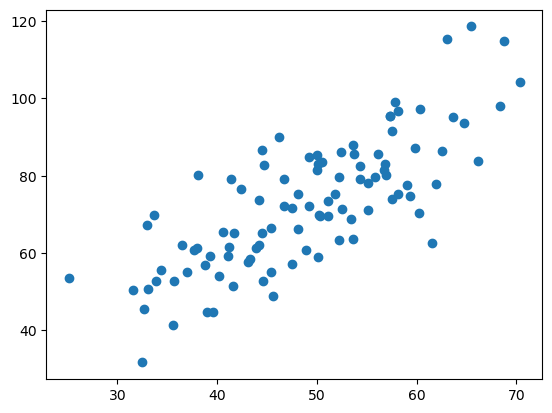

In [2]:
points = np.genfromtxt('data.csv', delimiter=',')
# 提取 points 中的两列数据分别作为 x,y

x=points[:,0]
y=points[:,1]

# 画出散点图
plt.scatter(x, y)

In [3]:
# 定义损失函数
# 损失函数是系数的函数，另外还要传入数据的 x,y
def compute_cost(w, b, points):
    total_cost = 0
    M = len(points)
    
    # 逐点计算平方损失误差，然后求平均数
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y-w*x-b)**2
        
    return total_cost/M 

In [4]:
# 定义模型的超参数
alpha = 0.0001

initial_w = 0
initial_b = 0

num_iter = 10


In [5]:
# 定义核心梯度下降算法函数
def grad_desc(points, initial_w, initial_b, alpha, num_iter):
    w = initial_w
    b = initial_b
    
    cost_list = []
    
    for i in range(num_iter):
        cost_list.append(compute_cost(w, b, points))
        w, b = step_grad_desc(w, b, alpha, points)
        
    return w, b, cost_list


def step_grad_desc(w, b, alpha, points):
    sum_grad_w = 0
    sum_grad_b = 0
    M = len(points)
    
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_grad_w += (w*x+b-y)*x
        sum_grad_b += w*x+b-y
    
    grad_w = 2/M * sum_grad_w
    grad_b = 2/M * sum_grad_b
    
    updated_w = w - alpha * grad_w
    updated_b = b - alpha * grad_b
    
    return updated_w, updated_b
        

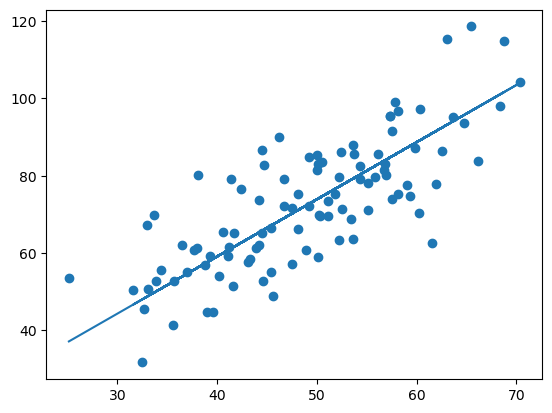

In [11]:
# 测试  
w, b, cost_list = grad_desc(points, initial_w, initial_b, alpha, num_iter)
w, b, cost_list

# plt.plot(cost_list)

p_y = w*x + b

plt.scatter(x, y)
plt.plot(x, p_y)

